In [6]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import PIL
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
from itertools import chain
from skimage import io, feature, measure
import numpy
import scipy.cluster.hierarchy as hcluster

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook
from scipy.signal import find_peaks
# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

<IPython.core.display.Javascript object>


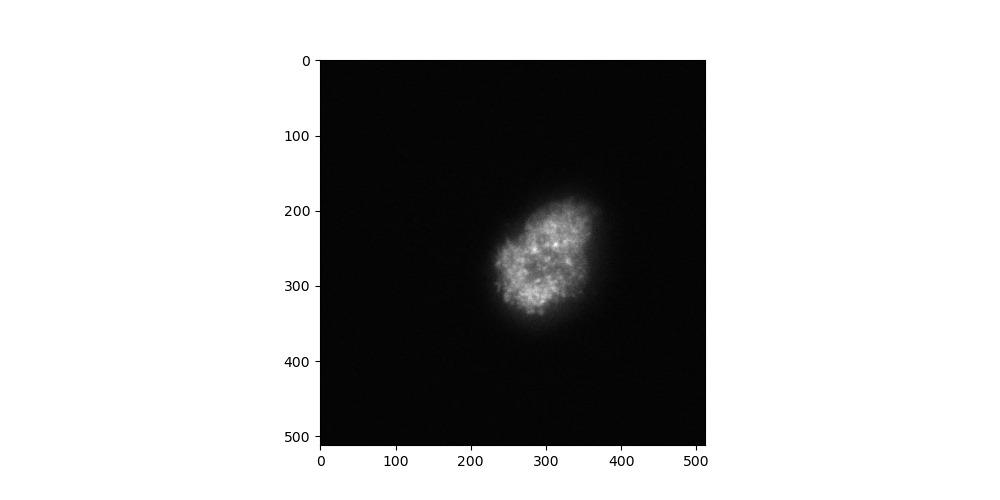

In [11]:

#%matplotlib notebook
@pims.pipeline
def gray(image):
    return image[:,:,1]  # Take just the green channel

frames = (pims.open('../Documents/actin send2 (copy)/mouse wt1/*.jpg'))

#tmMwt,dataMwt=find_traj_data(framesMwt,conect,mem,size,mass,filt)
#msd_Mwt,dt_Mwt=find_msd(tmMwt,40)
n=1
f = tp.locate(frames[n],size,minmass=mass)
#tp.annotate(f, frames[n],plot_style={'markersize':10});
plt.imshow(frames[n])

In [8]:
print(frames[n])

[[10 10 10 ... 11 11 10]
 [11 11 11 ... 11 11 10]
 [11 11 11 ... 12 11 10]
 ...
 [11 11 11 ... 11 11 12]
 [11 11 11 ... 11 11 11]
 [11 11 11 ... 11 10 10]]


In [12]:
import numpy as np
from scipy.ndimage import find_contours
import matplotlib.pyplot as plt

# Assuming frames is a list of images

# Get the image at index n
image = frames[n]

# Convert the image to grayscale if necessary
gray_image = gray(image)  # Assuming the gray() function converts the image to grayscale

# Threshold the image to convert it into a binary image
threshold = 0.5  # Adjust this threshold value as per your requirements
binary_image = gray_image > threshold

# Find the contours of the binary image
contours = find_contours(binary_image, 0.5)  # Adjust the contour level as per your requirements

# Extract the coordinates of the boundary
boundary_coords = []
for contour in contours:
    coords = np.flip(contour, axis=1)  # Flip the coordinates to match the image axes
    boundary_coords.append(coords)

# Plot the image with the boundary overlay
plt.imshow(image, cmap='gray')
for coords in boundary_coords:
    plt.plot(coords[:, 1], coords[:, 0], 'r')  # Assuming you want to plot the boundary in red

plt.show()

ImportError: cannot import name 'find_contours' from 'scipy.ndimage' (/home/samuel/anaconda3/lib/python3.9/site-packages/scipy/ndimage/__init__.py)